# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

![tweezers holding a diamond](diamond.jpg)

Photo by <a href="https://unsplash.com/@tahliaclaire?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tahlia Doyle</a> on <a href="https://unsplash.com/s/photos/diamonds?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [1]:
# Your code here
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
diamonds = pd.read_csv('diamonds.csv', index_col=0)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# diamonds should be a dataframe
assert type(diamonds) == pd.DataFrame

# Check that there are the correct number of rows
assert diamonds.shape[0] == 53940

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert diamonds.shape[1] == 10

Inspect the distributions of the numeric features:

In [4]:
# Run this cell without changes
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


And inspect the value counts for the categorical features:

In [5]:
# Run this cell without changes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    print(diamonds[col].value_counts(), "\n")

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64 



## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [9]:
# Your code here - look at correlations
diamonds.corr()['price']

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

Identify the name of the predictor column with the strongest correlation below.

In [11]:
# Replace None with appropriate code
most_correlated = 'carat'

The following code checks that you specified a column correctly:

In [12]:
# Run this cell without changes

# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in diamonds.drop("price", axis=1).columns

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

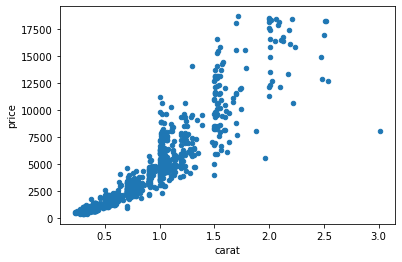

In [13]:
# Run this cell without changes

# Plot a sample of 1000 data points, most_correlated vs. price
diamonds.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [26]:
# Replace None with appropriate code
y = diamonds['price']
X_baseline = diamonds[[most_correlated]]

The following code checks that you created valid `y` and `X_baseline` variables:

In [27]:
# Run this code without changes

# y should be a series
assert type(y) == pd.Series

# y should contain about 54k rows
assert y.shape == (53940,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [28]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [29]:
# Your code here
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:13:48   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

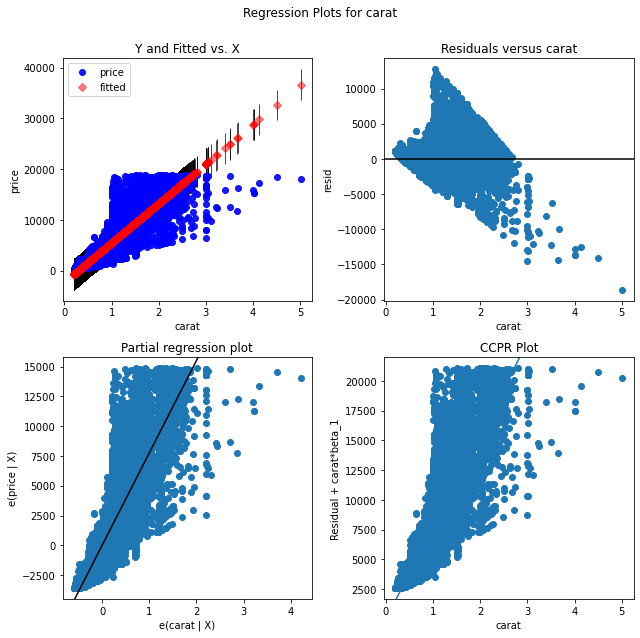

In [34]:
fig = plt.figure(figsize=(9,9))
sm.graphics.plot_regress_exog(baseline_results, "carat", fig=fig)
plt.show()

Then summarize your findings below:

In [ ]:
# Your written answer here
"""
Model: price = 7756.4*carat - 2256.4

The model says that the price of a diamond increases by $7756.4 dollars per carat.
It also claims that a hypothetical 0-carat diamond would cost negative $2256.4. That is all nonsense, but it is fine because
we don't need the model to tell us about 0-carat diamonds.

The fit is significant because the p-value of the F-statistic is well below 0.05.
Both the constant and the slope are significant with p-values well below 0.05.
The R-squared value is 0.849.

The plot of the fit does indicate that the line is fitting a trend, however, the plot of the residuals shows that there is
clearly a trend that can still be fit. This is why the next step is going to ask me to do a multiple linear regression.
"""

<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.

* The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
* The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

</details>    

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

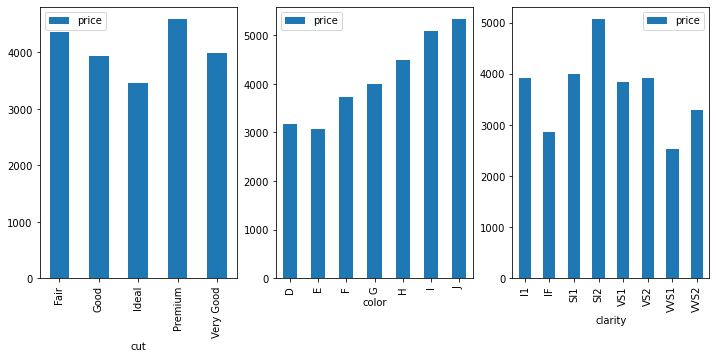

In [35]:
# Run this code without changes
import matplotlib.pyplot as plt

categorical_features = diamonds.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    diamonds.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

Identify the name of the categorical predictor column you want to use in your model below. The choice here is more open-ended than choosing the numeric predictor above -- choose something that will be interpretable in a final model, and where the different categories seem to have an impact on the price.

In [36]:
# Replace None with appropriate code
cat_col = 'color'

The following code checks that you specified a column correctly:

In [37]:
# Run this cell without changes

# cat_col should be a string
assert type(cat_col) == str

# cat_col should be one of the categorical columns
assert cat_col in diamonds.select_dtypes("object").columns

### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation **and** your selected categorical feature.

In [38]:
# Run this cell without changes
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated

,carat,color
1,0.23,E
2,0.21,E
3,0.23,E
4,0.29,I
5,0.31,J
...,...,...
53936,0.72,D
53937,0.72,D
53938,0.70,D
53939,0.86,H


### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

In [39]:
# Replace None with appropriate code

# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
X_iterated = pd.get_dummies(X_iterated, columns = [cat_col])
X_iterated

,carat,color_D,color_E,color_F,color_G,color_H,color_I,color_J
1,0.23,0,1,0,0,0,0,0
2,0.21,0,1,0,0,0,0,0
3,0.23,0,1,0,0,0,0,0
4,0.29,0,0,0,0,0,1,0
5,0.31,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
53936,0.72,1,0,0,0,0,0,0
53937,0.72,1,0,0,0,0,0,0
53938,0.70,1,0,0,0,0,0,0
53939,0.86,0,0,0,0,1,0,0


The following code checks that you have the right number of columns:

In [40]:
# Run this cell without changes

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = diamonds.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference".

In [41]:
# Your code here
# Since D is the best color, I will use that as the baseline
X_iterated.drop(labels = 'color_D', axis = 1, inplace = True)
X_iterated

,carat,color_E,color_F,color_G,color_H,color_I,color_J
1,0.23,1,0,0,0,0,0
2,0.21,1,0,0,0,0,0
3,0.23,1,0,0,0,0,0
4,0.29,0,0,0,0,1,0
5,0.31,0,0,0,0,0,1
...,...,...,...,...,...,...,...
53936,0.72,0,0,0,0,0,0
53937,0.72,0,0,0,0,0,0
53938,0.70,0,0,0,0,0,0
53939,0.86,0,0,0,1,0,0


Now you should have 1 fewer column than before:

In [42]:
# Run this cell without changes

# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [43]:
# Your code here
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()
iterated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:34:17   Log-Likelihood:            -4.6998e+05
No. Observations:               53940   AIC:                         9.400e+05
Df Residuals:                   53932   BIC:                         9.400e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2136.2289     20.122   -106.162      0.000   -2175.669   -2096.789
carat       8066.6230     14.040    574.558      0.000    8039.105    8094.141
color_E      -93.7813     23.252     -4.033      0.000    -139.355     -48.208
color_F      -80.2629     23.405     -3.429      0.001    -126.136     -34.390
color_G      -85.5363     22.670     -3.773      0.000    -129.969     -41.103
color_H     -732.2418     24.354    -30.067      0.000    -779.975    -684.508
color_I    -1055.7319     27.310    -38.657      0.000   -1109.260   -1002.203
color_J    -1914.4722     33.777    -56.679      0.000   -1980.676   -1848.268
==============================================================================
Omnibus:                    12266.990   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165317.069
Skew:                           0.719   Prob(JB):                         0.00
Kurtosis:                      11.455   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [44]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:34:58   Log-Likelihood:            -4.6998e+05
No. Observations:               53940   AIC:                         9.400e+05
Df Residuals:                   53932   BIC:                         9.400e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2136.2289     20.122   -106.162      0.0

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.

In [ ]:
# Your written answer here
"""
Model: price = -2136.2 + 8066.6*carat - (93.8 if E, 80.3 if F, 85.54 if G, 732.2 if H, 1055.7 if I, 1914.5 if J)

The adjusted R-squared value is 0.864.
The F-statistic p-value is essentially 0, so the overall model is significant.
Each parameter value is significant since all the p-values are below 0.05.

I chose D as the baseline color because it is the best color. As expected, each other color subtracts from the predicted
price and worse colors tend to subtract more (except for E which subtracts 93.8 and F which subtracts 80.3)
"""

## 7. A Thing I am Adding Because I am Curious
In this module, a big deal was made about removing one category to avoid the multicollinearity problem.
My intuition is that I could also fix it by not adding a constant. That way, it is like each category has its own unique constant (I think this would only work with one-hot encoded categories).
I am going to test this out below by NOT dropping a category and NOT adding a constant.

In [46]:
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated = pd.get_dummies(X_iterated, columns = [cat_col])  # Not dropping any categories
X_iterated

,carat,color_D,color_E,color_F,color_G,color_H,color_I,color_J
1,0.23,0,1,0,0,0,0,0
2,0.21,0,1,0,0,0,0,0
3,0.23,0,1,0,0,0,0,0
4,0.29,0,0,0,0,0,1,0
5,0.31,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
53936,0.72,1,0,0,0,0,0,0
53937,0.72,1,0,0,0,0,0,0
53938,0.70,1,0,0,0,0,0,0
53939,0.86,0,0,0,0,1,0,0


In [47]:
test_model = sm.OLS(y, X_iterated)  # Not using sm.add_constant
test_results = test_model.fit()
test_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:46:54   Log-Likelihood:            -4.6998e+05
No. Observations:               53940   AIC:                         9.400e+05
Df Residuals:                   53932   BIC:                         9.400e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       8066.6230     14.040    574.558      0.000    8039.105    8094.141
color_D    -2136.2289     20.122   -106.162      0.000   -2175.669   -2096.789
color_E    -2230.0101     17.502   -127.411      0.000   -2264.315   -2195.705
color_F    -2216.4917     18.272   -121.305      0.000   -2252.305   -2180.678
color_G    -2221.7651     17.578   -126.393      0.000   -2256.219   -2187.312
color_H    -2868.4707     20.607   -139.200      0.000   -2908.860   -2828.081
color_I    -3191.9607     24.642   -129.531      0.000   -3240.260   -3143.661
color_J    -4050.7011     32.208   -125.766      0.000   -4113.829   -3987.573
==============================================================================
Omnibus:                    12266.990   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165317.069
Skew:                           0.719   Prob(JB):                         0.00
Kurtosis:                      11.455   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_iterated.columns[2:]

Index(['color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J'], dtype='object')

In [59]:
for col in X_iterated.columns[2:]:
    print(col,'- color_D =', test_results.params[col]-test_results.params['color_D'], iterated_results.params[col])
    
print('color_D =', test_results.params['color_D'], iterated_results.params['const'])

color_E - color_D = -93.78128771967204 -93.7812877197632
color_F - color_D = -80.26285788580026 -80.26285788584664
color_G - color_D = -85.53628160001517 -85.53628160013416
color_H - color_D = -732.2418256357178 -732.2418256357352
color_I - color_D = -1055.7318567059701 -1055.731856706025
color_J - color_D = -1914.472202758217 -1914.47220275829
color_D = -2136.2288534377294 -2136.228853436732


In the new fit, the value corresponding to color_D is the same as the constant in the previous fit. This makes sense considering color_D was the baseline in that model.

All of the parameter values for the other colors differ from the color_D coefficient by exactly the amount indicated by the previous fit. This shows that this new model is essentially identical to the old one and it will make the same predictions.

The similarity of the models is also supported by the identical F-values, p-values (for F), R-squared, log-likelihood, AIC, and BIC. All of the numbers below the parameter values in the summary were also identical EXCEPT for condition number. Generally, lower condition numbers are better and the new model has a lower condition number (6.32 vs 11.0). I would need a better understanding of condition number to know whether this is actually a sign that the new model is meaningfully better.

In [66]:
test_results.cov_params()

,carat,color_D,color_E,color_F,color_G,color_H,color_I,color_J
carat,197.113228,-129.660063,-129.674227,-145.181473,-152.011794,-179.727670,-202.420961,-229.072526
color_D,-129.660063,404.907702,85.299037,95.499623,99.992573,118.223933,133.151463,150.682724
color_E,-129.674227,85.299037,306.336408,95.510056,100.003496,118.236848,133.166009,150.699185
color_F,-145.181473,95.499623,95.510056,333.866536,111.962533,132.376342,149.090823,168.720726
color_G,-152.011794,99.992573,100.003496,111.962533,308.995138,138.604222,156.105066,176.658493
color_H,-179.727670,118.223933,118.236848,132.376342,138.604222,424.642855,184.567257,208.868131
color_I,-202.420961,133.151463,133.166009,149.090823,156.105066,184.567257,607.246725,235.240838
color_J,-229.072526,150.682724,150.699185,168.720726,176.658493,208.868131,235.240838,1037.371662


In [67]:
iterated_results.cov_params()

,const,carat,color_E,color_F,color_G,color_H,color_I,color_J
const,404.907702,-129.660063,-319.608665,-309.408079,-304.915130,-286.683769,-271.756240,-254.224978
carat,-129.660063,197.113228,-0.014165,-15.521411,-22.351731,-50.067607,-72.760898,-99.412463
color_E,-319.608665,-0.014165,540.646037,319.619098,319.619589,319.621581,319.623211,319.625127
color_F,-309.408079,-15.521411,319.619098,547.774992,321.378039,323.560488,325.347440,327.446081
color_G,-304.915130,-22.351731,319.619589,321.378039,513.917695,325.295419,327.868733,330.890898
color_H,-286.683769,-50.067607,319.621581,323.560488,325.295419,593.102691,338.099564,344.869176
color_I,-271.756240,-72.760898,319.623211,325.347440,327.868733,338.099564,745.851503,356.314354
color_J,-254.224978,-99.412463,319.625127,327.446081,330.890898,344.869176,356.314354,1140.913916


While the best-fit parameter values were the same, the variances and covariances are not.
The variances that do match are the slope for the carat data and the color_D coefficient with the constant.
The model with no constant and no dropped category has smaller variances than the previous model.

Another big difference in the covariance matrices is that the new model has all positive covariances between the different colors, but the previous model has negative covariance between the constant and the non-baseline colors. Also, the covariance values tend to be quite a bit smaller in the new model (Example: the covariance between color_E and color_F was 319.6 in the previous model, but is now 95.5 in the new model). The exception is the covariances between carat and the colors which got much larger in the new model.

The covariances in the previous model can be turned into the new covariances by propagating the uncertainty.

Example: If you want to know the effective constant for color_E in the previous model, you need to add color_E to const.
The uncertainty in this new value is the sum of their respective variances PLUS double their covariance.
The calculation is shown below:

In [68]:
540.646 + 404.907 - 2*319.608

306.3369999999999

This value is identical to the variance given for color_E in the new model.

The covariances can also be obtained this way. If I want to find the covariance between color_E and color_F in the new model, I can do this calculation on the values in the previous model:

var(const) + cov(color_E,color_F) + cov(color_E,const) + cov(color_F,const)

This calculation is done below:

In [69]:
404.908 + 319.619 - 319.609 - 309.408

95.51000000000005

In [ ]:
The result is 95.51, which is the same as the covariance between color_E and color_F in the new model.

This also explains why the covariances with respect to the carat parameter changed.

They all got the covariance between the const and carat parameters when going to the new model.

In conclusion, using all the categories and NOT adding a constant appears to produce exactly the same model, but it is just a little hard to show that.

## Summary

Congratulations, you completed an iterative linear regression process! You practiced developing a baseline and an iterated model, as well as identifying promising predictors from both numeric and categorical features.